In [1]:
! pip install kaggle

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# from google.colab import files
# uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [4]:
# ! mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle
# ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# ! kaggle datasets download -d laotse/credit-risk-dataset

Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 97.1MB/s]


In [6]:
# ! unzip credit-risk-dataset.zip

Archive:  credit-risk-dataset.zip
  inflating: credit_risk_dataset.csv  


# Business Understanding

In [13]:
import pandas as pd

data = pd.read_csv('C:/Users/ASUS/Downloads/credit risk/credit_risk_dataset.csv', encoding="utf-8")
data.head(5)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [14]:
data.shape

(32581, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


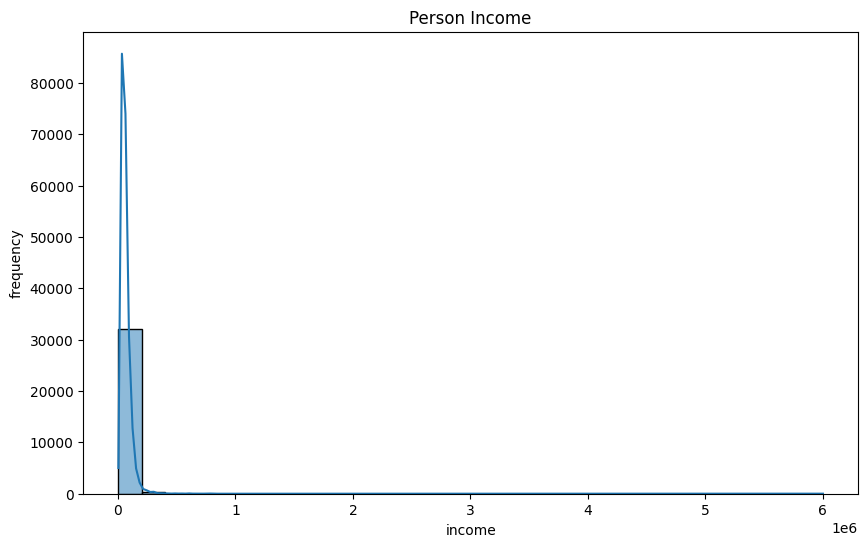

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#person income
plt.figure(figsize=(10,6))
sns.histplot(data['person_income'], bins=30, kde=True)
plt.title('Person Income')
plt.xlabel('income')
plt.ylabel('frequency')
plt.show()

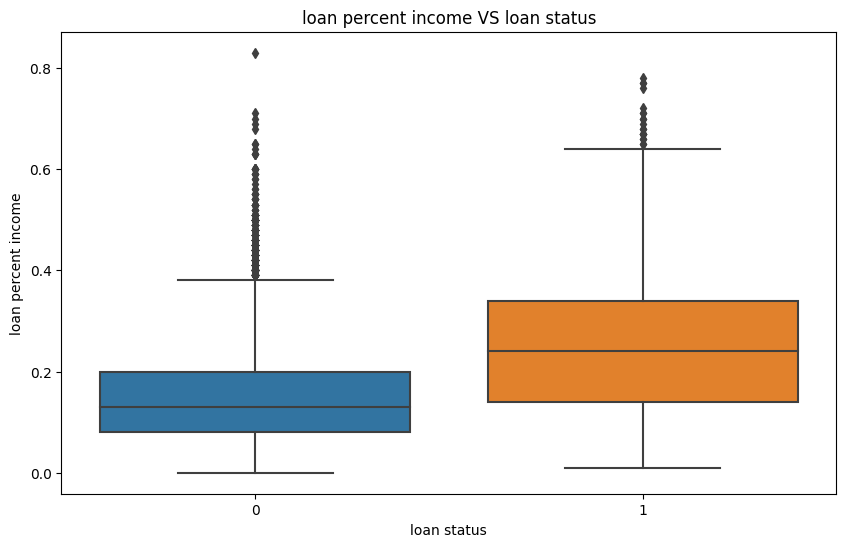

In [18]:
#loan percent vs loan status
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=data)
plt.title('loan percent income VS loan status')
plt.xlabel('loan status')
plt.ylabel('loan percent income')
plt.show()

## Feature

Feature terlatak pada colom Loan_status dikarenakan akan memprediksi credit risk

In [19]:
dfg = data.groupby('loan_status').size().reset_index(name='total')
dfg['%'] = round(dfg['total'] * 100 / dfg['total'].sum(), 3)
print(dfg)


   loan_status  total       %
0            0  25473  78.184
1            1   7108  21.816


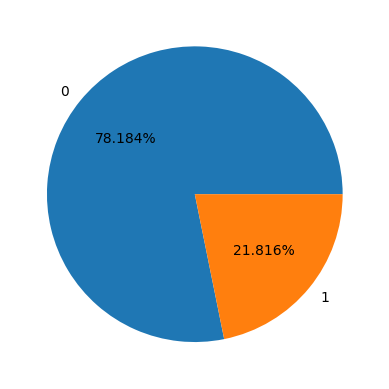

In [20]:
plt.pie(dfg['total'], labels=dfg['loan_status'], autopct='%.3f%%')
plt.show()

berdasarkan tabel diatas persentase **loan_status** dengan gagal bayar sebesar 21.816%. analisis ini dilakukan untuk menurunkan deafault rate <10%



In [21]:
data.groupby('loan_status').agg({'loan_amnt':'sum'}).reset_index()

,loan_status,loan_amnt
0,0,235305925
1,1,77125375


total kerugian perusahaan akibat gagal bayar sebesar $77125375 dikarenakan peminjam tidak mampu bayar

# Data Collection

In [22]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [23]:
data1 = data.copy()

In [24]:
# drop = data1.isnull().sum().sort_values()
# drop = drop[drop == data1.shape[0]]
# drop = list(drop.index)

# print ('dimensi data sebelum drop =', data1.shape)

# data1.drop(columns= drop, inplace=True)
# print('sesudah di drop =', data1.shape)

In [25]:
nums = []
cats = []

for i in data1.columns:
    if data1[i].dtype == 'object':
        cats.append(i)
    else:
        nums.append(i)

print('Jumlah fitur numerik =', len(nums))
print('Fitur numerik =', nums)
print('Jumlah fitur kategorikal =', len(cats))
print('Fitur kategorikal =', cats)


Jumlah fitur numerik = 8
Fitur numerik = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
Jumlah fitur kategorikal = 4
Fitur kategorikal = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [26]:
data1['loan_amnt'][data1['loan_status']==1].sum()

77125375

# Statistical Summary for Categorical Features

In [27]:
data1[cats].describe().T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836




*   `person_home_ownership` : status kepemilikan rumah
*   `loan_intent` : tujuan pinjaman
* `loan_grade` : peringkat pinjaman
* `cb_person_default_on_file` : individu memiliki catatan credit gagal atau tidak sebelumnya.



# Statistical Summary for Numerical Features

In [28]:
data1[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


* `person_age` merupakan usia dari individu yang
melakukan pinjaman.

*   `person income` : pendapatan individu yang mengajukan pinjaman.
*  `person_emp_length` : lama pengalaman kerja

* `loan_amnt` : jumlah punjaman
* `loan_int_rate` : suku bunga pinjaman dari pinjaman yang diberikan.
* `loan_status` : status pinjaman yang diberikan, 1 merupakan gagal bayar dan 0 tidak gagal bayar.
* `loan_percent_income` : persetase pendapatan yang digunakan untuk membayaran pinjaman.
* `cb_person_cred_hist_lengh` : panjang masa kredit dalam bulan.

feature berdasarkan 5C ⁉

1.   Character : `cb_person_default_on_file`
2.   Capacity : `person_income`, `loan_amnt`
3.   Collateral : `home_ownership`
4. Ccapital : `home_ownership`
5. Conditional : `loan_int_rate`, `loan_grade`



# Exploratory Data Analysis

## Statistical summary : Categorical Features

In [29]:
data1[cats].describe().T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [30]:
for i in cats:
  print('------'*10)
  print(i)
  print(data1[i].value_counts())

------------------------------------------------------------
person_home_ownership
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
------------------------------------------------------------
loan_intent
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
------------------------------------------------------------
loan_grade
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
------------------------------------------------------------
cb_person_default_on_file
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


**Observasi**


*   Label `cb_person_default_on_file` diubah kedalam bentuk biner
*   Label `Loan_grade` diubah kedalam bentuk urutan grade

## Statistical Summary : Numerical Features

In [31]:
data1[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


## Univariate Analysis : Categorical Features

In [32]:
#membuat urutan feature grade
temp = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
data1 ['loan_grade']= pd.Categorical(data1['loan_grade'], categories=temp, ordered=True)

### Loan grade

In [33]:
dfg = data1.groupby('loan_grade').size().reset_index(name='total')
dfg['%'] = round(dfg['total'] * 100 / dfg['total'].sum(), 3)
print(dfg)


  loan_grade  total       %
0          A  10777  33.078
1          B  10451  32.077
2          C   6458  19.821
3          D   3626  11.129
4          E    964   2.959
5          F    241   0.740
6          G     64   0.196


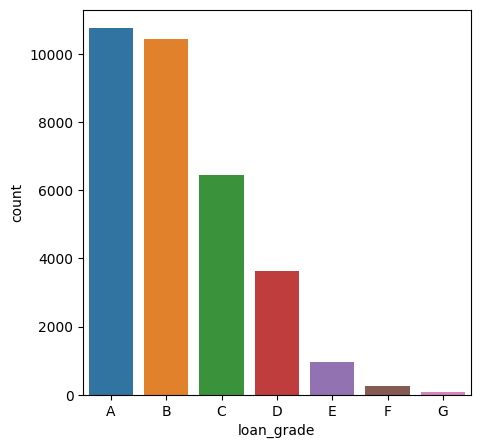

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(x=data1['loan_grade'])
plt.show()

feature `loan_grade` didominasi oleh label A dan B

### Loan_Intent


In [35]:
dfg = data1.groupby('loan_intent').size().reset_index(name='total')
dfg['%'] = round(dfg['total'] * 100 / dfg['total'].sum(), 3)
print(dfg)


         loan_intent  total       %
0  DEBTCONSOLIDATION   5212  15.997
1          EDUCATION   6453  19.806
2    HOMEIMPROVEMENT   3605  11.065
3            MEDICAL   6071  18.634
4           PERSONAL   5521  16.945
5            VENTURE   5719  17.553


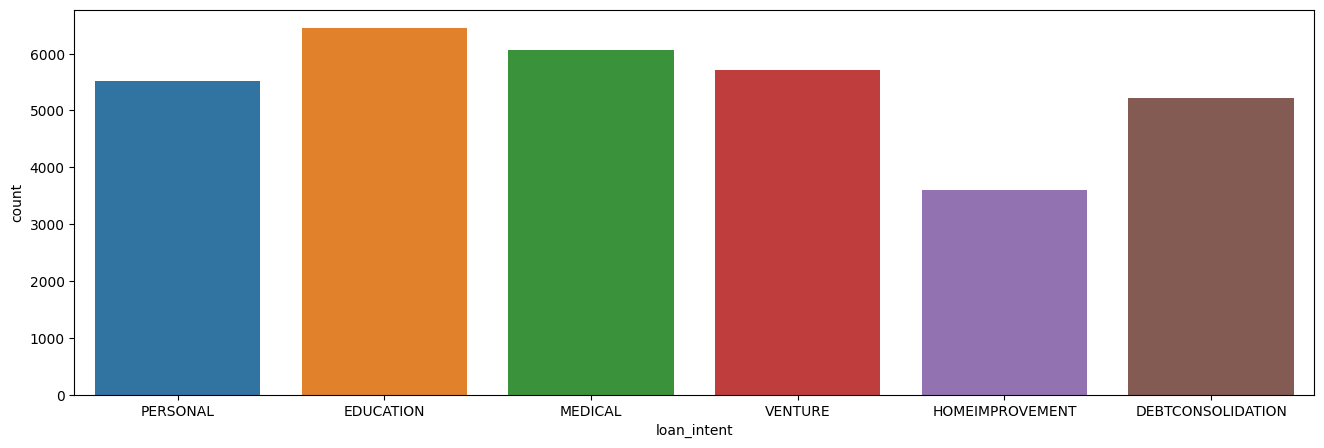

In [36]:
plt.figure(figsize=(16,5))
sns.countplot(x=data1['loan_intent'])
plt.show()

### person_home_ownership

In [37]:
dfg = data1.groupby('person_home_ownership').size().reset_index(name='total')
dfg['%'] = round(dfg['total'] * 100 / dfg['total'].sum(), 3)
print(dfg)


  person_home_ownership  total       %
0              MORTGAGE  13444  41.263
1                 OTHER    107   0.328
2                   OWN   2584   7.931
3                  RENT  16446  50.477


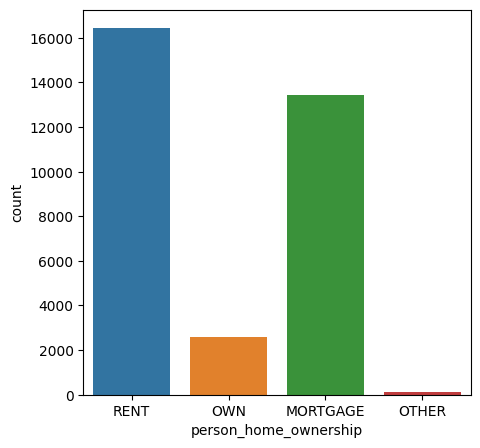

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x=data1['person_home_ownership'])
plt.show()

### cb_person_default_on_file

In [39]:
dfg = data1.groupby('cb_person_default_on_file').size().reset_index(name='total')
dfg['%'] = round(dfg['total'] * 100 / dfg['total'].sum(), 3)
print(dfg)


  cb_person_default_on_file  total       %
0                         N  26836  82.367
1                         Y   5745  17.633


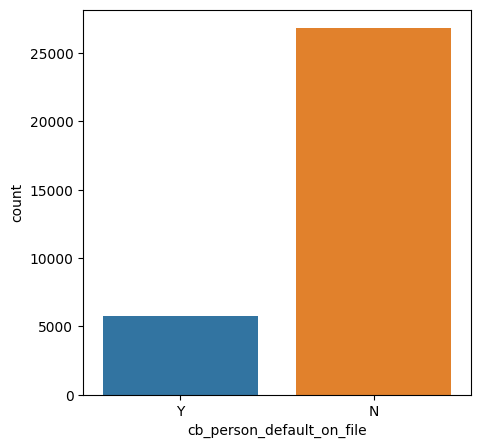

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(x=data1['cb_person_default_on_file'])
plt.show()

feature `cb_person_default_on_file` didominasi label N yang berarti sebanyak 82% tidak gagal bayar dan 17% gagal bayar



## Univariate Analysis : Numerical Features

In [41]:
print(nums)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [42]:
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

In [43]:
len(numerical)

8

### Distribution Numerical Features

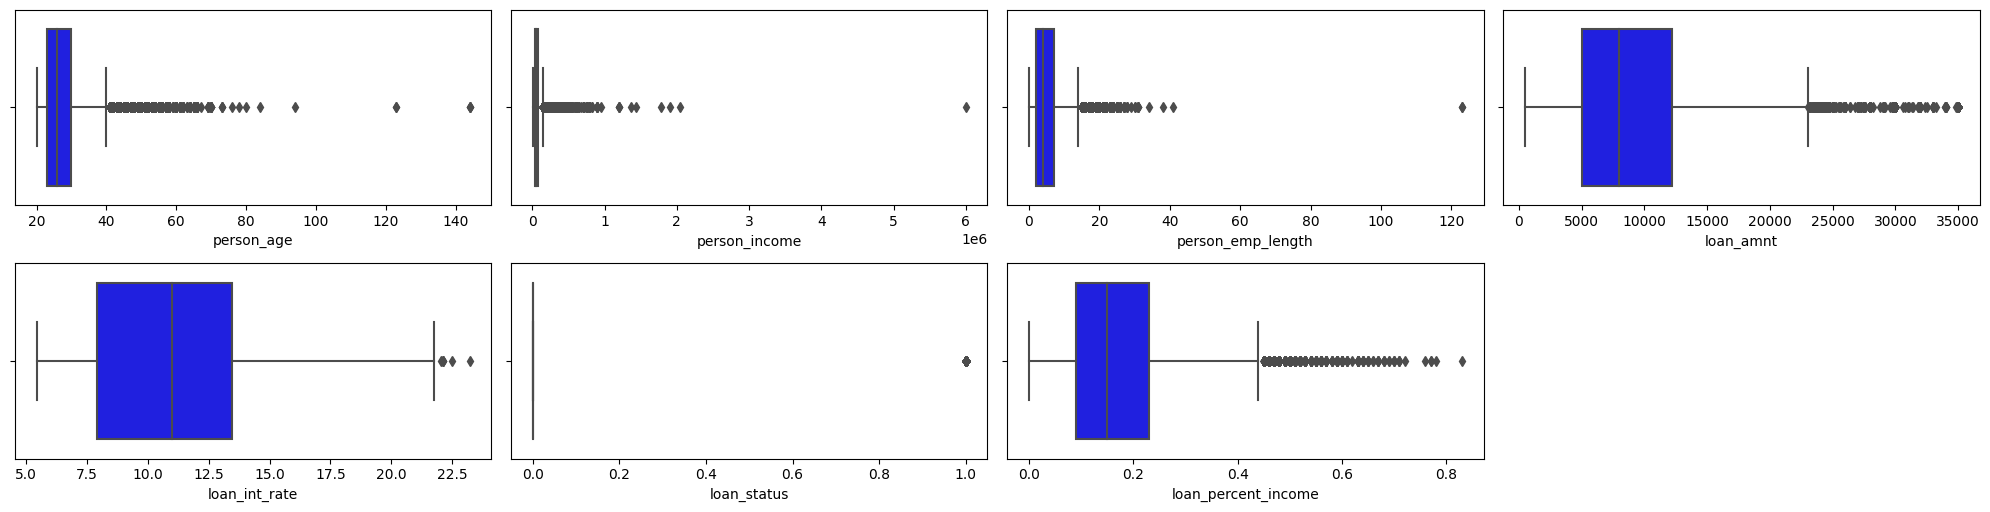

In [44]:
plt.figure(figsize=(20,20))
for i in range(0, len(temp)):
  plt.subplot(8,4,i+1)
  sns.boxplot(x=data1[numerical[i]], color='blue')
  plt.xlabel(numerical[i])
  plt.tight_layout()

## Bivariate Analysis : Categorical Features

In [45]:
print(cats)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [46]:
categorical = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [47]:
len(categorical)

4

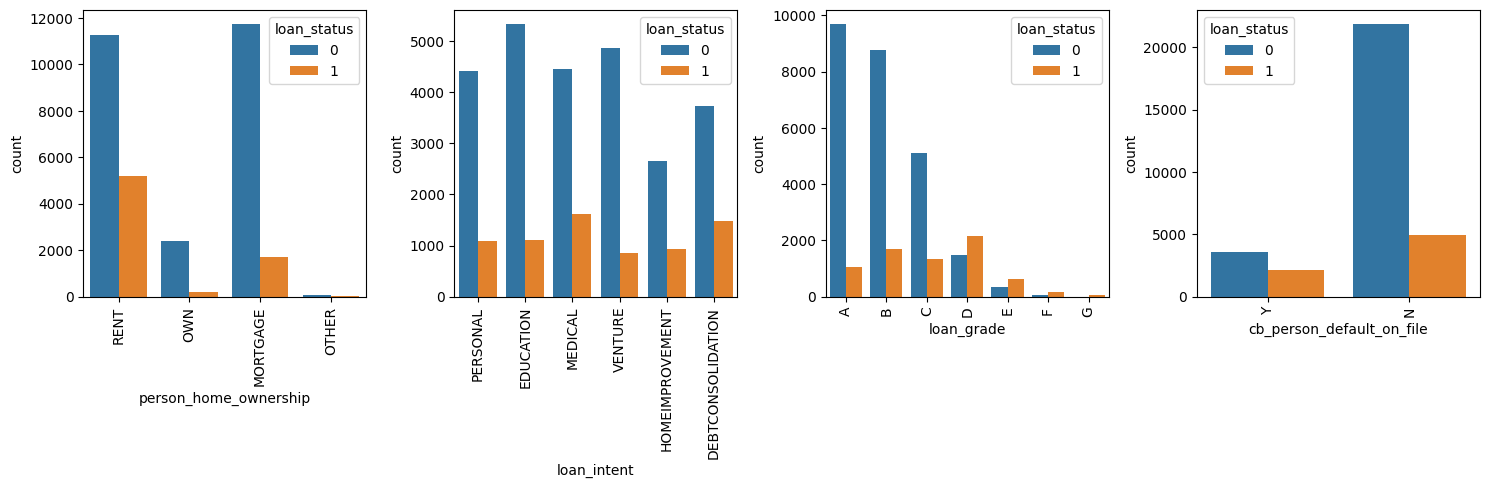

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
for i in range(0, len(categorical)):
    plt.subplot(2, 4, i+1)
    sns.countplot(data=data1, x=categorical[i], hue='loan_status')
    plt.xlabel(categorical[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


* `person_home_ownership` status gagal bayar paling banyak yaitu RENT
* `loan_inten` status gagal bayar paling banyak untuk medical dan debtconsolidation
* `loan_grade` pada grade D paling banyak gagal bayar.
* `cb_person_default_on_file` orang yang memiliki catatan gagal bayar sebelumnya yang paling banyak gagal bayar

## Bivariate Analysis : Numerical Features

In [49]:
print(numerical)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [50]:
cats = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']

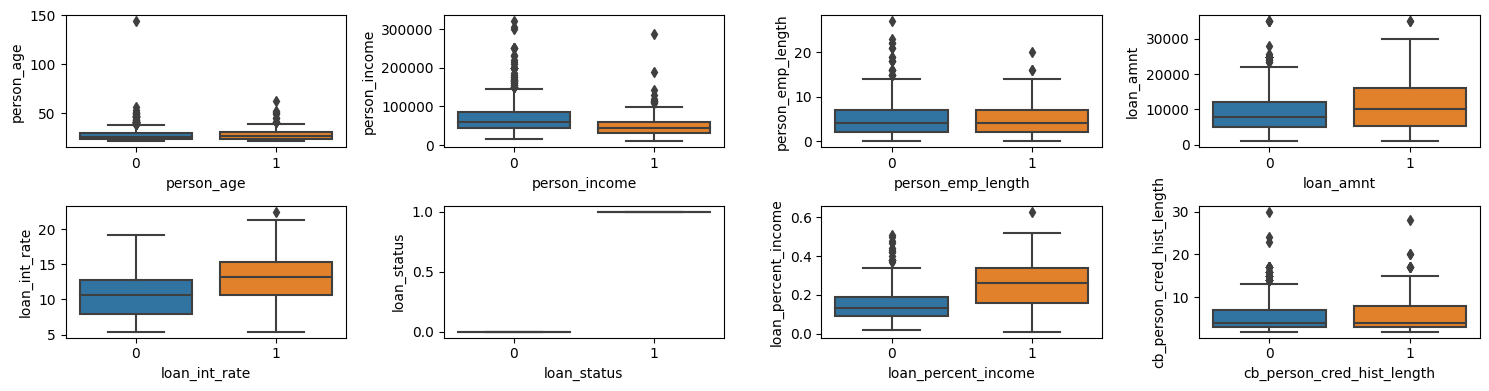

In [51]:
box = data1.sample(1000, random_state=1)
plt.figure(figsize=(15,15))
for i in range(0, len(cats)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(y=box[cats[i]], x=data1['loan_status'])
    plt.xlabel(cats[i])
    plt.tight_layout()

## Mulrivariate Analysis

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(nums.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

AttributeError: 'list' object has no attribute 'corr'

<Figure size 1500x800 with 0 Axes>

## Insight

In [53]:
data1[data1['loan_status']==1].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [54]:
import numpy as np

a = data1[data1['loan_status'] == 1][['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]
a['must_to_pymnt'] = np.where(a['cb_person_cred_hist_length'] == 3, 'Yes', 'No')
a.head()


,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,must_to_pymnt
0,35000,16.02,0.59,3,Yes
2,5500,12.87,0.57,3,Yes
3,35000,15.23,0.53,2,No
4,35000,14.27,0.55,4,No
5,2500,7.14,0.25,2,No


In [55]:
import numpy as np

#jumlah yang harus dibayarkann

a = data1[data1['loan_status'] == 1][['loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]
a['pymnt'] = np.where(a['cb_person_cred_hist_length'] == 3, a['loan_amnt']*(1+a['loan_int_rate']), a['loan_amnt'])
a.head()


,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,pymnt
0,35000,16.02,0.59,3,595700.0
2,5500,12.87,0.57,3,76285.0
3,35000,15.23,0.53,2,35000.0
4,35000,14.27,0.55,4,35000.0
5,2500,7.14,0.25,2,2500.0


jika `cb_person_cred_hist_length` = 3, maka pembayaran jumlah pinjaman ditambahkan bunga

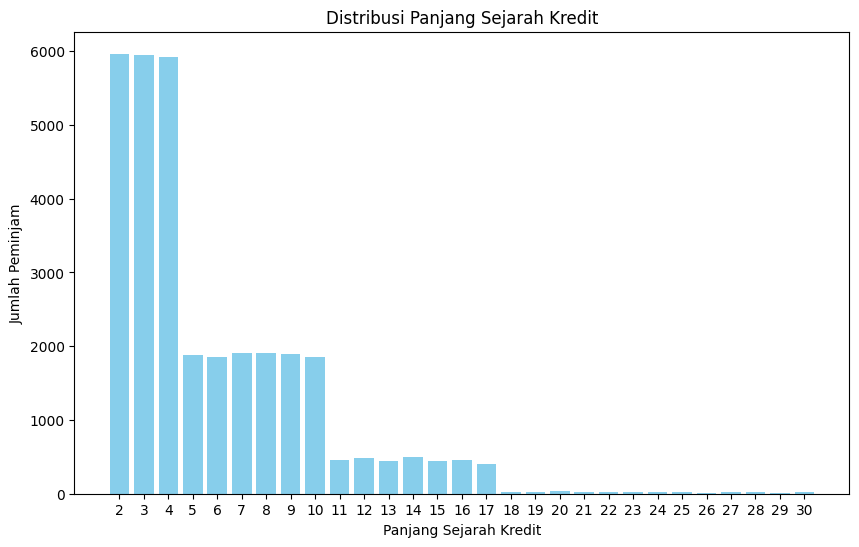

In [56]:
# Credit_hist_credit
cred_hist_dist = data1['cb_person_cred_hist_length'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(cred_hist_dist.index, cred_hist_dist.values, color='skyblue')
plt.xlabel('Panjang Sejarah Kredit')
plt.ylabel('Jumlah Peminjam')
plt.title('Distribusi Panjang Sejarah Kredit')
plt.xticks(cred_hist_dist.index)  # Menampilkan semua nilai pada sumbu x
plt.show()

### Rasio pendapatan terhadap pinjaman

In [57]:
data1.dtypes

person_age                       int64
person_income                    int64
person_home_ownership           object
person_emp_length              float64
loan_intent                     object
loan_grade                    category
loan_amnt                        int64
loan_int_rate                  float64
loan_status                      int64
loan_percent_income            float64
cb_person_default_on_file       object
cb_person_cred_hist_length       int64
dtype: object

In [58]:
a = data1[data1['loan_status']==1][[ 'loan_amnt', 'person_income']]
a['income_loan_ratio'] = a['loan_amnt'] / a['person_income']
a

,loan_amnt,person_income,income_loan_ratio
0,35000,59000,0.593220
2,5500,9600,0.572917
3,35000,65500,0.534351
4,35000,54400,0.643382
5,2500,9900,0.252525
...,...,...,...
32563,7000,71520,0.097875
32565,15000,40000,0.375000
32571,20000,45600,0.438596
32574,20000,65004,0.307673


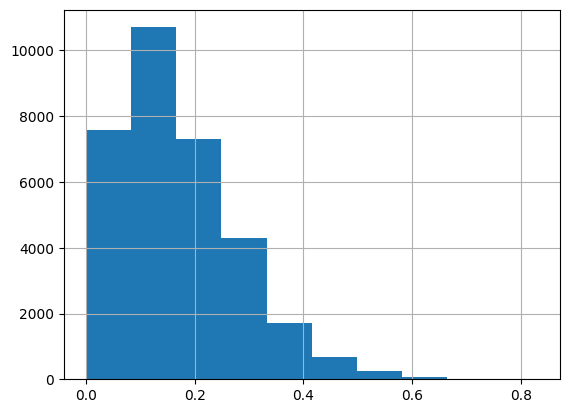

In [59]:
mean_loan_percent_income = data1['loan_percent_income'].mean()
loan_percent_income_distribution = data1['loan_percent_income'].hist()


# Cleaning Data

In [60]:
data2 = data1.copy()

In [61]:
data2.shape

(32581, 12)

## Check Missing Value

In [68]:
mv = data2.isnull().sum().sort_values(ascending=False)
mv

loan_int_rate                 3116
person_emp_length              895
person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

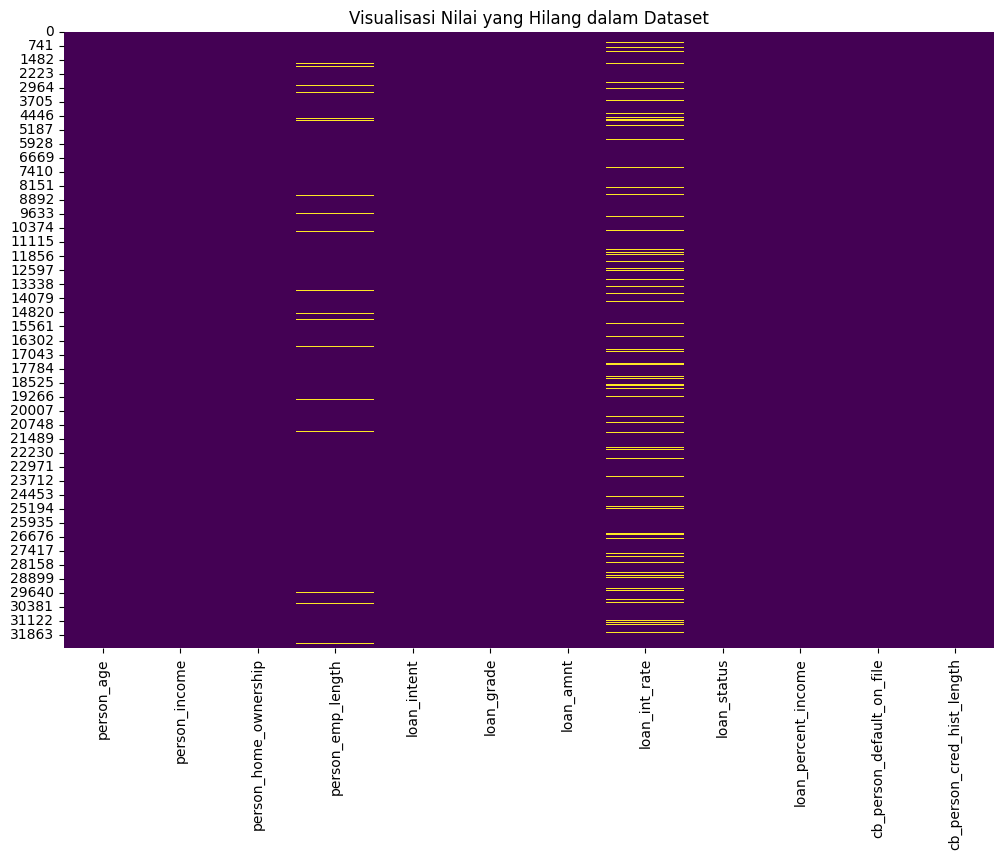

In [70]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(data2.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Nilai yang Hilang dalam Dataset')
plt.show()

### Handling missing values

menghapus nilai yang hilang lebih dari 50%

In [75]:
# Menghapus kolom dengan lebih dari 50% nilai yang hilang
threshold = 0.5
data3 = data2.dropna(thresh=int(data1.shape[0] * threshold), axis=1)


In [90]:
data3 = data3.dropna(axis=0)

In [91]:
from sklearn.impute import SimpleImputer

# Mengisi nilai NaN dengan mean dari kolom tersebut
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [92]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,29465.0,9584.744612,6316.272282,500.000000,5000.000,8000.00,12250.000000,35000.00
person_income,29465.0,66020.470490,61901.422932,4000.000000,38500.000,55000.00,79100.000000,6000000.00
person_age,29465.0,27.714712,6.300193,20.000000,23.000,26.00,30.000000,144.00
loan_int_rate,29465.0,11.011695,3.240459,5.420000,7.900,10.99,13.470000,23.22
loan_status,29465.0,0.219379,0.413833,0.000000,0.000,0.00,0.000000,1.00
income_to_loan_ratio,29465.0,9.730289,13.329443,1.204819,4.375,6.76,11.171875,1200.00


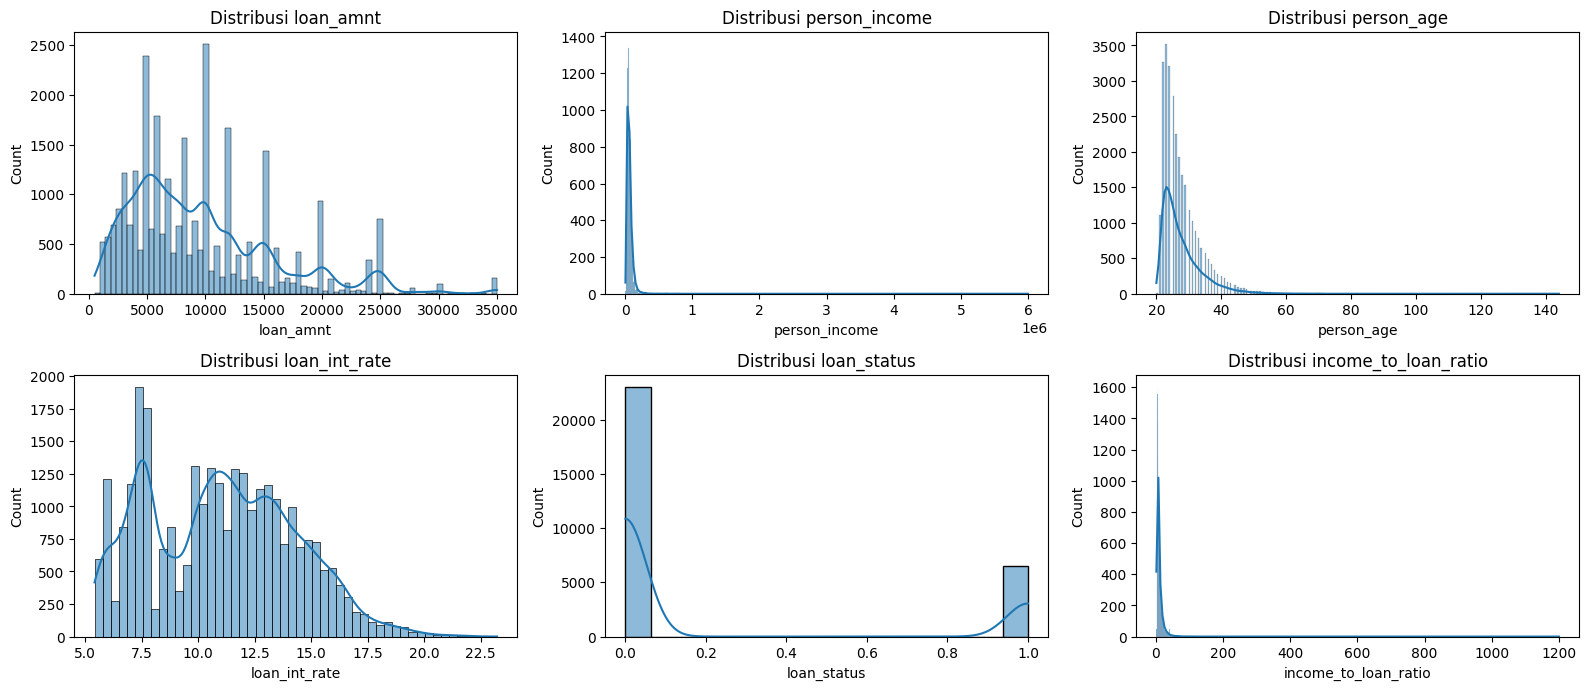

In [94]:
numeric_columns = data3.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data3[column], kde=True)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

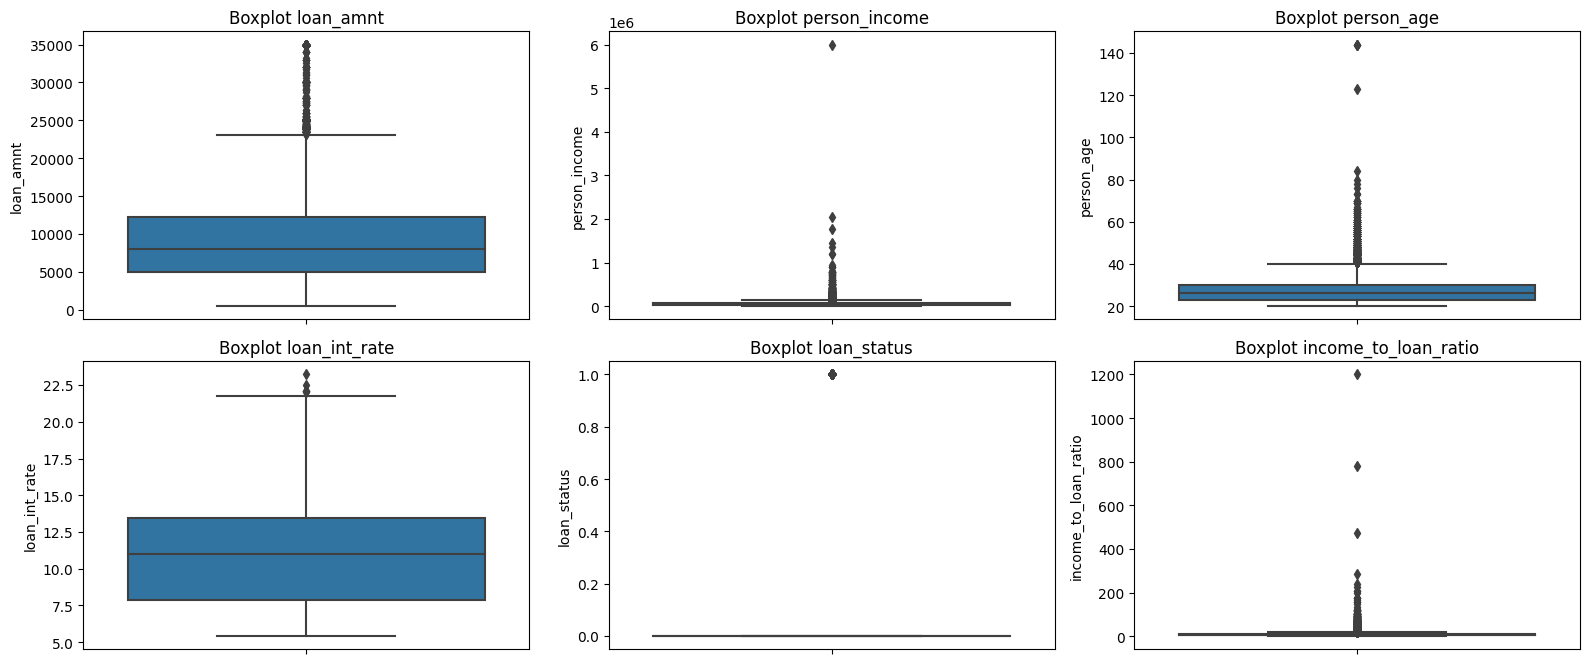

In [95]:
# Visualisasi boxplot untuk memeriksa outliers
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data3[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()


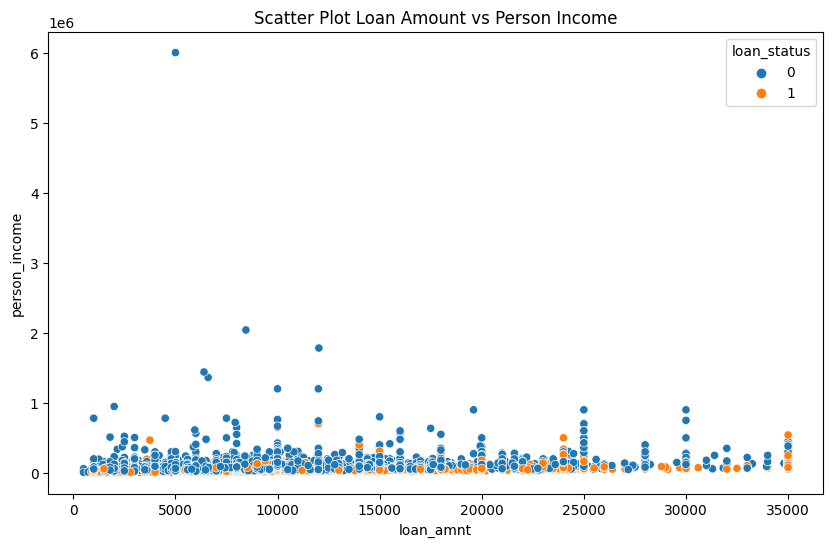

In [96]:
# Scatter plot untuk hubungan antar variabel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data3, x='loan_amnt', y='person_income', hue='loan_status')
plt.title('Scatter Plot Loan Amount vs Person Income')
plt.show()


## Feature Selection

In [97]:
# Memilih fitur yang relevan
selected_features = ['loan_amnt', 'person_income', 'person_age', 'loan_int_rate', 'loan_status']
data3 = data3[selected_features]

# Feature Engineering (contoh: membuat fitur baru)
data3['income_to_loan_ratio'] = data3['person_income'] / data3['loan_amnt']


## Data Scaling

In [98]:
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur dan target
X = data3.drop('loan_status', axis=1)
y = data3['loan_status']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Logisitik Regression

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Melatih model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4388  197]
 [ 843  465]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4585
           1       0.70      0.36      0.47      1308

    accuracy                           0.82      5893
   macro avg       0.77      0.66      0.68      5893
weighted avg       0.81      0.82      0.80      5893



In [101]:
from sklearn.ensemble import RandomForestClassifier

# Melatih model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[4329  256]
 [ 474  834]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4585
           1       0.77      0.64      0.70      1308

    accuracy                           0.88      5893
   macro avg       0.83      0.79      0.81      5893
weighted avg       0.87      0.88      0.87      5893

